In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185]
y = [55, 70, 65, 80, 75]
plt.plot(x, y, 'o')


In [ ]:
a = 0.45
b = -35.0
x_plot = np.linspace(145, 190, 100)
y_plot = a * x_plot + b

plt.plot(x, y, 'o')

plt.plot(x_plot, y_plot, 'r')

In [ ]:
a = 0.5 + np.linspace(-0.2, 0.2, 100) #-0.2부터 0.2까지 100개로 쪼갠다
b = -30 + np.linspace(-20, 20, 100)
A, B = np.meshgrid(a, b)

L = np.zeros_like(A)

for xi, yi in zip(x, y):
    L = (yi - (A * xi + B))**2

plt.figure()
plt.contour(a,b, L, 30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

plt.figure(figsize=[10,9])
ax = plt.axes(projection = "3d")
ax.plot_surface(A, B, L); plt.xlabel("a"); plt.ylabel('b')
ax.set_zlim([0,5000])

a_opt = A[L==np.min(L)]
b_opt = B[L==np.min(L)]

print(f"optimal a = {a_opt}") #최소의 로스를 찾은것
print(f"optimal b = {b_opt}")

plt.figure()
y_plot = a_opt * x_plot + b_opt 
plt.plot(x, y, 'o')
plt.plot(x_plot, y_plot, 'r')

In [ ]:
a_opt = A[L==np.min(L)]
b_opt = B[L==np.min(L)]



print(f"optimal a = {A[L==np.min(L)]}") #최소의 로스를 찾은것
print(f"optimal b = {B[L==np.min(L)]}")

In [ ]:
import torch 
a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0 , requires_grad = True)

L = 0 

for xi, yi in zip(x, y):
    L += (yi-(a*xi+b))**2

L.backward() # 자동 미분
print(a.grad)
print(b.grad)
LR = 1e-6
a = a.detach() - LR*a.grad #숫자만 이쁘게 나오게 하려면 detach 붙임
b = b.detach() - LR*b.grad
print( a, b)
plt.figure()
y_plot = a * x_plot + b
plt.plot(x, y, "o")
plt.plot(x_plot, y_plot, 'r')

In [ ]:
a.requires_grad=True
b.requires_grad=True

L = 0 

for xi, yi in zip(x, y):
    L += (yi-(a*xi+b))**2

L.backward() # 자동 미분
print(a.grad)
print(b.grad)

LR = 1e-6
a = a.detach() - LR*a.grad #숫자만 이쁘게 나오게 하려면 detach 붙임
b = b.detach() - LR*b.grad
print( a, b)

plt.figure()
y_plot = a * x_plot + b
plt.plot(x, y, "o")
plt.plot(x_plot, y_plot, 'g')

C:\Users\kmoup\AppData\Local\Temp\ipykernel_55076\4096242646.py:18: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  y_plot = a * x_plot + b


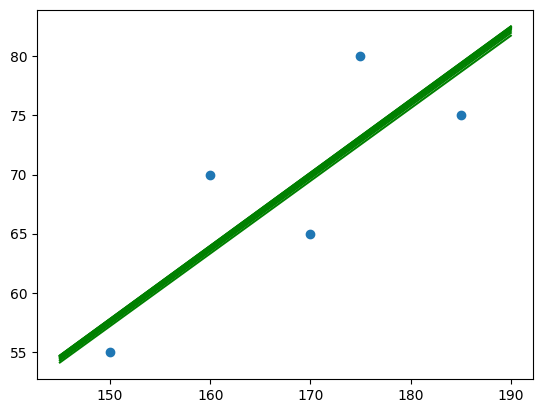

In [38]:
EPOCH = 10

plt.plot(x, y, 'o')
for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L = 0 

    for xi, yi in zip(x, y):
        L += (yi-(a*xi+b))**2

    L.backward() # 자동 미분

    a = a.detach() - LR*a.grad #숫자만 이쁘게 나오게 하려면 detach 붙임
    b = b.detach() - LR*b.grad

    y_plot = a * x_plot + b

    plt.plot(x_plot, y_plot, 'g')




[0.44999998807907104, 0.49788498878479004]
[-35.0, -34.999717712402344]


AttributeError: 'numpy.ndarray' object has no attribute 'requires_grad'

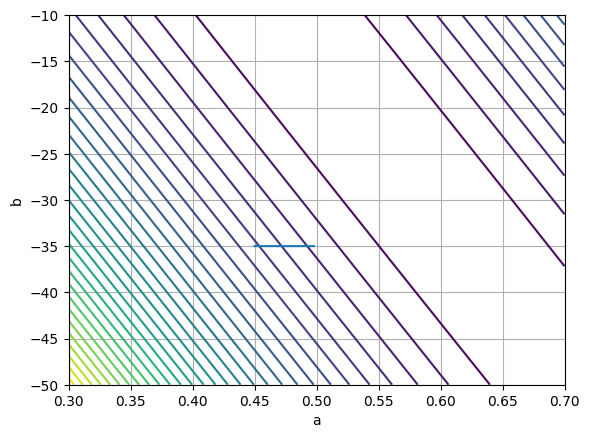

In [39]:
# history 보기

import numpy as np
import matplotlib.pyplot as plt
import torch


x = [150, 160, 170, 175, 185]
y = [55, 70, 65, 80, 75]
x_plot = np.linspace(145, 190, 100)

EPOCH = 10
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0 , requires_grad = True)
a_hist = [a.detach().item()] #detach는 requires_grad를 떼고 순수하게 값만 가져온다고 생각하면 된다
b_hist = [b.detach().item()]

for _ in range(EPOCH):
    a.requires_grad=True
    b.requires_grad=True

    L = 0 

    for xi, yi in zip(x, y):
        L += (yi-(a*xi+b))**2

    L.backward() # 자동 미분

    a = a.detach() - LR*a.grad #숫자만 이쁘게 나오게 하려면 detach 붙임
    b = b.detach() - LR*b.grad

    a_hist += [a.item()]
    b_hist += [b.item()]

    a = 0.5 + np.linspace(-0.2, 0.2, 100) #-0.2부터 0.2까지 100개로 쪼갠다
    b = -30 + np.linspace(-20, 20, 100)
    A, B = np.meshgrid(a, b)

    L = np.zeros_like(A)
    for xi, yi in zip(x, y):
     L += (yi - (A * xi + B))**2

    plt.figure()
    plt.contour(a,b, L, 30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

    plt.plot(a_hist, b_hist)
    print(a_hist)
    print(b_hist)




[0.44999998807907104, 0.49788498878479004]
[-35.0, -34.999717712402344]


AttributeError: 'numpy.ndarray' object has no attribute 'backward'

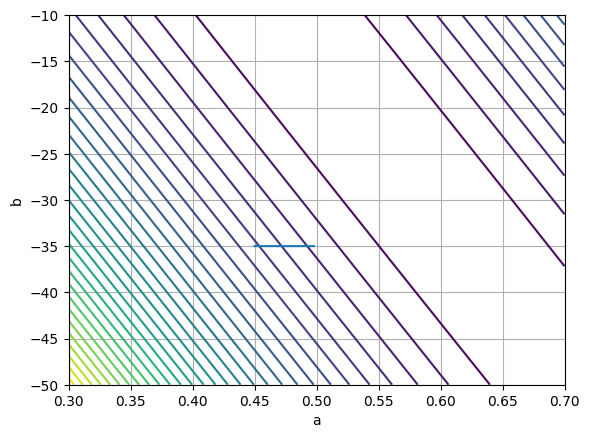

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185]
y = [55, 70, 65, 80, 75]

EPOCH = 10
LR = 1e-6

a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

a_hist = [a.item()]
b_hist = [b.item()]

for _ in range(EPOCH):
    L = 0
    for xi, yi in zip(x, y):
        L += (yi - (a * xi + b))**2

    L.backward()

    with torch.no_grad():
        a -= LR * a.grad
        b -= LR * b.grad

    a.grad.zero_()
    b.grad.zero_()

    a_hist.append(a.item())
    b_hist.append(b.item())

    plt.figure()
    plt.contour(a,b, L, 30); plt.xlabel("a"); plt.ylabel("b"); plt.grid()

    plt.plot(a_hist, b_hist)
    print(a_hist)
    print(b_hist)


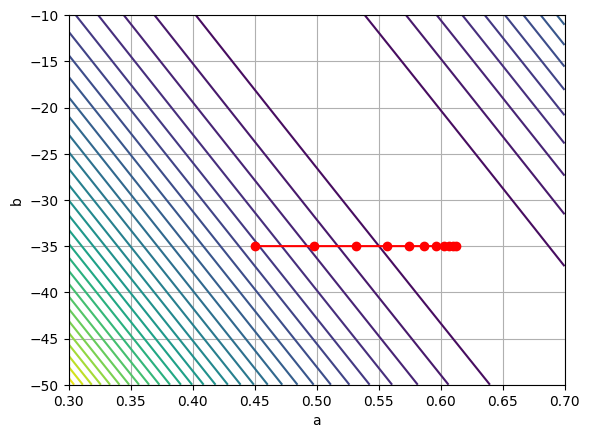

a history: [0.44999998807907104, 0.49788498878479004, 0.5321845412254333, 0.5567529797554016, 0.5743511319160461, 0.5869565010070801, 0.5959855914115906, 0.6024530529975891, 0.6070855855941772, 0.610403835773468, 0.6127806901931763]
b history: [-35.0, -34.999717712402344, -34.999515533447266, -34.99937057495117, -34.999267578125, -34.99919128417969, -34.99913787841797, -34.99909973144531, -34.99907302856445, -34.999053955078125, -34.99903869628906]


In [40]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = [150, 160, 170, 175, 185]
y = [55, 70, 65, 80, 75]

EPOCH = 10
LR = 1e-6

# ===== 학습용 변수 (torch) =====
a = torch.tensor(0.45, requires_grad=True)
b = torch.tensor(-35.0, requires_grad=True)

a_hist = [a.item()]
b_hist = [b.item()]

# ===== 학습 루프 =====
for _ in range(EPOCH):
    loss = 0
    for xi, yi in zip(x, y):
        loss += (yi - (a * xi + b))**2

    loss.backward()

    with torch.no_grad():
        a -= LR * a.grad
        b -= LR * b.grad

    a.grad.zero_()
    b.grad.zero_()

    a_hist.append(a.item())
    b_hist.append(b.item())

# ===== loss surface 계산 (NumPy, 학습과 분리) =====
a_grid = 0.5 + np.linspace(-0.2, 0.2, 100)
b_grid = -30 + np.linspace(-20, 20, 100)
A, B = np.meshgrid(a_grid, b_grid)

L_grid = np.zeros_like(A)
for xi, yi in zip(x, y):
    L_grid += (yi - (A * xi + B))**2

# ===== 시각화 =====
plt.figure()
plt.contour(a_grid, b_grid, L_grid, 30)
plt.plot(a_hist, b_hist, 'ro-')
plt.xlabel("a")
plt.ylabel("b")
plt.grid()
plt.show()

print("a history:", a_hist)
print("b history:", b_hist)
